In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [2]:
root_path = '/Users/sahajsomani1/Desktop/DSC 383/'

In [3]:
locations = ['Albany Koaa', 'Ann Arbor-Detroit Koaa', 'Atlanta KOAA', 'Austin Koaa', 'Charlotte Koaa', 
                 'Dallas KOAA', 'Denver Koaa', 'DMV KOAA', 'Fairfield County Koaa', 'FT Worth KOAA', 'Hartford Koaa', 'Houston Koaa', 
                 'Hudson Valley Koaa', 'Indianapolis KOAA', 'Jacksonville KOAA', 'Kansas City KOAA', 'Memphis KOAA', 
                 'Midcities KOAA', 'Milwaukee KOAA', 'Minneapolis', 'Nashville KOAA', 'Nassau KOAA', 'Philadelphia KOAA', 
                 'Phoenix KOAA', 'Pittsburgh KOAA','Providence KOAA', 'Research Triangle KOAA',  'Saint Louis KOAA', 
                 'Salt Lake City KOAA', 'Tampa KOAA', 'Toronto KOAA', 'Vancouver KOAA', 'Westchester KOAA']

In [4]:
all_categories = ['Voice/Chorus', 'Film', 'CreativeWriting', 'Guitar', 'Reading/Storytime', 'Cooking', 'Gardening',
                  'PreschoolMusicPlay', 'Participatory(e.g.,musicjamsessions,dancing,theater)', 'Dance',
                  'BallroomDancing', 'Piano', 'Stringedinstruments', 'Music', 'Drums', 'Arts:Performance',
                  'Wind/brassinstruments', 'Drama', 'Arts:Performance',
                  'Participatory(e.g.,musicjamsessions,dancing,theater)', 'Piano', 'Stringedinstruments',
                  'Music', 'Drums', 'Arts:Performance', 'Wind/brassinstruments', 'Drama', 'Arts:Performance',
                  'Participatory(e.g.,musicjamsessions,dancing,theater)', 'Arts:Visual', 'Drawing',
                  'Painting/sculpture', 'ArtsandCrafts', 'Photography', 'Hands-on', 'Nature/Outdoors', 'Tennis',
                  'Archery', 'CanoeingandKayaking', 'HorsebackRiding', 'Gardening', 'Hiking', 'Biking',
                  'Running&Track', 'Skiing', 'Rowing', 'Nature/Outdoors', 'Tutoring/Testprep',
                  'Technology/Computers', 'Academic', 'Mathematics', 'HomeSchooling', 'Science',
                  'Technology/Computers', 'Academic', 'Mathematics', 'ForeignLanguage', 'History', 'Language',
                  'Chess', 'Nature/Outdoors', 'Tennis', 'Swimming', 'Basketball', 'CanoeingandKayaking',
                  'HorsebackRiding', 'Hiking', 'Yoga', 'Rockclimbing', 'Skating', 'Biking', 'HealthfulLiving',
                  'CircusArts', 'Running&Track', 'Bowling', 'Dance', 'Skiing', 'Rowing', 'Fencing', 'MartialArts',
                  'BallroomDancing', 'Exercise&Health', 'Baseball', 'Cooking', 'Lacrosse', 'Cheerleading',
                  'Hockey', 'Sports', 'Skiing/Snowboarding', 'Soccer', 'Gymnastics', 'Skiing', 'Golf',
                  'MartialArts', 'Technology/Computers', 'Academic', 'Mathematics', 'ForeignLanguage', 'History',
                  'Language', 'Chess', 'SpecialNeeds', 'SignLanguage/Deaf/HearingImpaired', 'Reading/Storytime',
                  'Preschool', 'PreschoolMusicPlay', 'Religious', 'Parenting', 'Pregnancy', 'Consignment',
                  'Modeling', 'Football']

In [5]:
regions = {}
regions['Northeast'] = ['Albany Koaa','DMV KOAA', 'Fairfield County Koaa', 'Hartford Koaa', 'Hudson Valley Koaa','Nassau KOAA', 'Philadelphia KOAA', 
                        'Pittsburgh KOAA', 'Providence KOAA', 'Westchester KOAA']
regions['Texas'] = ['Austin Koaa', 'Dallas KOAA', 'Houston Koaa', 'FT Worth KOAA','Midcities KOAA']
regions['Mountain'] = ['Denver Koaa', 'Phoenix KOAA', 'Salt Lake City KOAA']
regions['Southeast'] = ['Atlanta KOAA', 'Charlotte Koaa', 'Jacksonville KOAA', 'Memphis KOAA', 'Nashville KOAA', 'Research Triangle KOAA' ,'Tampa KOAA']
regions['Midwest'] = ['Ann Arbor-Detroit Koaa', 'Indianapolis KOAA' ,'Kansas City KOAA', 'Milwaukee KOAA','Minneapolis','Saint Louis KOAA']
regions['Canada'] = ['Toronto KOAA', 'Vancouver KOAA']

# Creating mapping dictionary
location_mapping = {}
for location in locations:
    for region in regions:
        if location in regions[region]:
            location_mapping[location] = region
            break

In [6]:
final_categories = {}
final_categories['Arts-Participate'] = ['Voice/Chorus', 'Film','CreativeWriting', 'Guitar','Reading/Storytime','Cooking',
                                       'Gardening','PreschoolMusicPlay', 'Participatory(e.g.,musicjamsessions,dancing,theater)']
final_categories['Arts-Watch'] = ['Dance', 'BallroomDancing','Piano', 'Stringedinstruments', 'Music', 'Drums', 'Arts:Performance',
                                               'Wind/brassinstruments', 'Drama', 'Arts:Performance', 'Participatory(e.g.,musicjamsessions,dancing,theater)']
final_categories['Arts-Watch:Music/Concert'] = ['Piano', 'Stringedinstruments', 'Music', 'Drums', 'Arts:Performance',
                                               'Wind/brassinstruments']
final_categories['Arts-Watch:Dramatic arts'] = ['Drama', 'Arts:Performance', 'Participatory(e.g.,musicjamsessions,dancing,theater)']
final_categories['Arts-Visual'] = ['Arts:Visual', 'Drawing', 'Painting/sculpture', 'ArtsandCrafts', 'Photography', 
                                 'Hands-on']
final_categories['Outdoor-general'] = ['Nature/Outdoors', 'Tennis', 'Archery', 'CanoeingandKayaking', 'HorsebackRiding',
                                      'Gardening', 'Hiking', 'Biking','Running&Track', 'Skiing', 'Rowing']
final_categories['STEM'] = ['Nature/Outdoors', 'Tutoring/Testprep', 'Technology/Computers', 'Academic', 'Mathematics', 
                           'HomeSchooling', 'Science','Technology/Computers', 'Academic', 'Mathematics', 'ForeignLanguage', 'History', 'Language',
                               'Chess']
final_categories['Active - Participatory:Exercise'] = ['Nature/Outdoors','Tennis','Swimming','Basketball',
                                                      'CanoeingandKayaking','HorsebackRiding','Hiking','Yoga','Rockclimbing',
                                                      'Skating','Biking','HealthfulLiving','CircusArts','Running&Track','Bowling',
                                                      'Dance','Skiing','Rowing','Fencing','MartialArts','BallroomDancing','Exercise&Health']
final_categories['Active - Participatory:Sports'] = ['Baseball','Cooking', 'Lacrosse', 'Cheerleading', 'Hockey',
                                                    'Sports', 'Skiing/Snowboarding', 'Soccer', 'Gymnastics', 'Skiing', 
                                                    'Golf', 'MartialArts', 'Football']
final_categories['Academic'] = ['Technology/Computers', 'Academic', 'Mathematics', 'ForeignLanguage', 'History', 'Language',
                               'Chess']
final_categories['Special needs'] = ['SpecialNeeds', 'SignLanguage/Deaf/HearingImpaired']

final_categories['Preschool'] = ['Reading/Storytime', 'Preschool','PreschoolMusicPlay']

final_categories['Other'] = ['Religious', 'Parenting', 'Pregnancy', 'Consignment', 'Modeling']

category_mapping = {}
for category in all_categories:
    for cluster in final_categories:
        if category in final_categories[cluster]:
            if category in category_mapping:
                category_mapping[category].add(cluster)
            else:
                category_mapping[category] = {cluster}

## Preprocessing Drupal Dataset

In [7]:
drupal_2015 = pd.read_csv(root_path+'Drupal/ActivityExportModified2015.csv', usecols = ['Title', 'URL', 'Domain ID', 'Categories'])
drupal_2016 = pd.read_csv(root_path+'Drupal/ActivityExportModified2016.csv', usecols = ['Title', 'URL', 'Domain ID', 'Categories'])
drupal_2017 = pd.read_csv(root_path+'Drupal/ActivityExportModified2017.csv', usecols = ['Title', 'URL', 'Domain ID', 'Categories'])
drupal_2018 = pd.read_csv(root_path+'Drupal/ActivityExportModified2018.csv', usecols = ['Title', 'URL', 'Domain ID', 'Categories'])
drupal_2020 = pd.read_csv(root_path+'Drupal/ActivityExportModified2019-2020.csv', usecols = ['Title', 'URL', 'Domain ID', 'Categories'])

In [8]:
drupal = pd.concat([drupal_2015, drupal_2016, drupal_2017, drupal_2018, drupal_2020])
drupal['page_path'] = drupal['Domain ID'] + drupal['URL']
drupal.dropna(inplace=True)
drupal.drop(['URL', 'Domain ID'], axis = 1, inplace=True)

## Merging GA and Drupal

In [9]:
def make_cluster(listy):
    s = set()
    for item in listy:
        for i in category_mapping[item]:
            s.add(i)
    return list(s)

In [10]:
main = pd.DataFrame()

for location in locations:
    data = pd.read_csv(root_path+'Data/'+location+'.csv', usecols = ['year_month', 'page_path', 'pageviews'])
    
    data['year_month'] = data['year_month'].astype(str)
    data['year_month'] = pd.to_datetime(data['year_month'], format = '%Y%m')
    data['page_path'] = data['page_path'].apply(lambda x: x[8:].replace('//','/'))
    
    merged = pd.merge(data ,drupal, on='page_path', how='inner')
    
    merged['Categories'] = merged['Categories'].apply(lambda x: x.replace(' ','').split(',,'))
    merged.sort_values(by='year_month', inplace=True)
        
    # Assigning cluster/clusters
    for category in all_categories:
        merged['Cluster'] = merged['Categories'].apply(lambda x: make_cluster(x))
        
    # Hot encoding regions
    for region in regions:
        merged['Region'] = location_mapping[location]    
    
    main = pd.concat([main,merged], ignore_index=True)

## Hot Encoded

In [11]:
main.head()

,year_month,page_path,pageviews,Title,Categories,Cluster,Region
0,2011-02-01,albany.kidsoutandabout.com/content/tutor-time,3,Tutor Time,"[Academic, Mathematics, Tutoring/Testprep]","[Academic, STEM]",Northeast
1,2011-02-01,albany.kidsoutandabout.com/content/1st-friday-...,10,1st Friday Of Albany,"[Arts:Performance, Dance, Drama, Music, Arts:V...","[Arts-Watch, Arts-Watch:Dramatic arts, Arts-Wa...",Northeast
2,2011-02-01,albany.kidsoutandabout.com/content/school-brea...,3,School Break Action Camp,"[Exercise&Health, Soccer]","[Active - Participatory:Exercise, Active - Par...",Northeast
3,2011-02-01,albany.kidsoutandabout.com/content/school-brea...,3,School Break Action Camp,"[Exercise&Health, Soccer]","[Active - Participatory:Exercise, Active - Par...",Northeast
4,2011-03-01,albany.kidsoutandabout.com/content/1st-friday-...,9,1st Friday Of Albany,"[Arts:Performance, Dance, Drama, Music, Arts:V...","[Arts-Watch, Arts-Watch:Dramatic arts, Arts-Wa...",Northeast


In [12]:
# Hot encoding regions
for category in final_categories:
    main[category] = main['Cluster'].apply(lambda x: 1 if category in x else 0)*main['pageviews']
    
# Hot encoding regions
for region in regions:
    main[region] = (main['Region'] == region).astype(int)

In [13]:
main.head()

,year_month,page_path,pageviews,Title,Categories,Cluster,Region,Arts-Participate,Arts-Watch,Arts-Watch:Music/Concert,Arts-Watch:Dramatic arts,Arts-Visual,Outdoor-general,STEM,Active - Participatory:Exercise,Active - Participatory:Sports,Academic,Special needs,Preschool,Other,Northeast,Texas,Mountain,Southeast,Midwest,Canada
0,2011-02-01,albany.kidsoutandabout.com/content/tutor-time,3,Tutor Time,"[Academic, Mathematics, Tutoring/Testprep]","[Academic, STEM]",Northeast,0,0,0,0,0,0,3,0,0,3,0,0,0,1,0,0,0,0,0
1,2011-02-01,albany.kidsoutandabout.com/content/1st-friday-...,10,1st Friday Of Albany,"[Arts:Performance, Dance, Drama, Music, Arts:V...","[Arts-Watch, Arts-Watch:Dramatic arts, Arts-Wa...",Northeast,10,10,10,10,10,0,0,10,0,0,0,0,0,1,0,0,0,0,0
2,2011-02-01,albany.kidsoutandabout.com/content/school-brea...,3,School Break Action Camp,"[Exercise&Health, Soccer]","[Active - Participatory:Exercise, Active - Par...",Northeast,0,0,0,0,0,0,0,3,3,0,0,0,0,1,0,0,0,0,0
3,2011-02-01,albany.kidsoutandabout.com/content/school-brea...,3,School Break Action Camp,"[Exercise&Health, Soccer]","[Active - Participatory:Exercise, Active - Par...",Northeast,0,0,0,0,0,0,0,3,3,0,0,0,0,1,0,0,0,0,0
4,2011-03-01,albany.kidsoutandabout.com/content/1st-friday-...,9,1st Friday Of Albany,"[Arts:Performance, Dance, Drama, Music, Arts:V...","[Arts-Watch, Arts-Watch:Dramatic arts, Arts-Wa...",Northeast,9,9,9,9,9,0,0,9,0,0,0,0,0,1,0,0,0,0,0


In [16]:
#main.drop(['Title', 'Categories', 'Cluster', 'Region'], axis=1)

In [17]:
def final_step(df,region):
    df = df[df[region] > 0]
    df = df.groupby('year_month').sum()
    
    for category in final_categories:
        df[category] = (df[category]/df['pageviews']).rolling(13).mean()
        
    return df.loc[:,list(final_categories.keys())]

In [18]:
temp = final_step(main, 'Northeast')

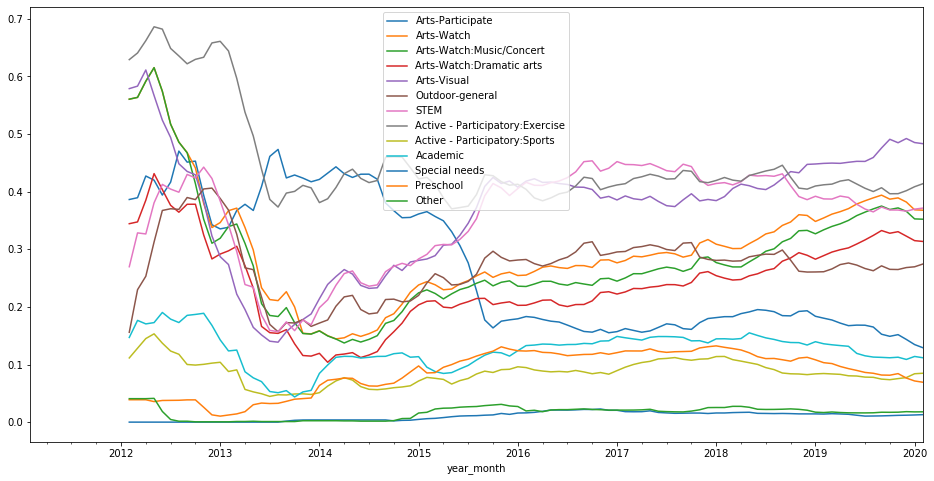

In [19]:
temp.plot(figsize=(16,8))
plt.savefig('/Users/sahajsomani1/Desktop/fig.png')

In [20]:
main.head()

,year_month,page_path,pageviews,Title,Categories,Cluster,Region,Arts-Participate,Arts-Watch,Arts-Watch:Music/Concert,Arts-Watch:Dramatic arts,Arts-Visual,Outdoor-general,STEM,Active - Participatory:Exercise,Active - Participatory:Sports,Academic,Special needs,Preschool,Other,Northeast,Texas,Mountain,Southeast,Midwest,Canada
0,2011-02-01,albany.kidsoutandabout.com/content/tutor-time,3,Tutor Time,"[Academic, Mathematics, Tutoring/Testprep]","[Academic, STEM]",Northeast,0,0,0,0,0,0,3,0,0,3,0,0,0,1,0,0,0,0,0
1,2011-02-01,albany.kidsoutandabout.com/content/1st-friday-...,10,1st Friday Of Albany,"[Arts:Performance, Dance, Drama, Music, Arts:V...","[Arts-Watch:Music/Concert, Arts-Watch, Arts-Vi...",Northeast,10,10,10,10,10,0,0,10,0,0,0,0,0,1,0,0,0,0,0
2,2011-02-01,albany.kidsoutandabout.com/content/school-brea...,3,School Break Action Camp,"[Exercise&Health, Soccer]","[Active - Participatory:Exercise, Active - Par...",Northeast,0,0,0,0,0,0,0,3,3,0,0,0,0,1,0,0,0,0,0
3,2011-02-01,albany.kidsoutandabout.com/content/school-brea...,3,School Break Action Camp,"[Exercise&Health, Soccer]","[Active - Participatory:Exercise, Active - Par...",Northeast,0,0,0,0,0,0,0,3,3,0,0,0,0,1,0,0,0,0,0
4,2011-03-01,albany.kidsoutandabout.com/content/1st-friday-...,9,1st Friday Of Albany,"[Arts:Performance, Dance, Drama, Music, Arts:V...","[Arts-Watch:Music/Concert, Arts-Watch, Arts-Vi...",Northeast,9,9,9,9,9,0,0,9,0,0,0,0,0,1,0,0,0,0,0


In [14]:
def analyze_seasonality(df,region):
    df = df[(df[region] > 0) & (df['year_month'].dt.year >= 2015)] # Filtering based on region and post 2015
    df = df.groupby(df['year_month'].dt.month).sum()
    
    #return df.loc[:,list(final_categories.keys())]
    months = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df.loc[:,list(final_categories.keys())].plot(figsize=(16,8), title=region)
    #plt.xlabel('Month')
    #plt.ylabel('Pageviews')

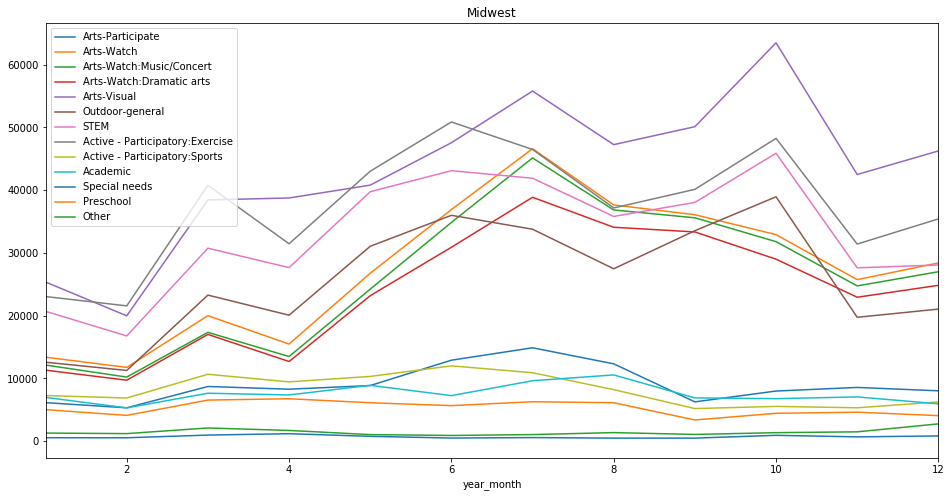

In [16]:
analyze_seasonality(main, 'Midwest')

In [27]:
main.groupby(main['year_month'].dt.month).sum().loc[:,list(final_categories.keys())]

,Arts-Participate,Arts-Watch,Arts-Watch:Music/Concert,Arts-Watch:Dramatic arts,Arts-Visual,Outdoor-general,STEM,Active - Participatory:Exercise,Active - Participatory:Sports,Academic,Special needs,Preschool,Other
year_month,,,,,,,,,,,,,
1,47092,105785,97845,92387,172240,80233,135408,153801,42355,57675,4557,36112,6447
2,44395,84547,76392,73124,150761,83891,131166,149143,41748,52666,4362,34420,5240
3,59623,118465,107834,103001,248094,141351,204571,224380,57819,73538,7257,45551,10328
4,57880,110991,100670,93879,261925,151856,210912,218477,63186,72237,8985,45172,11439
5,69213,146193,134262,125205,241568,155945,231102,234238,71111,90421,7939,44173,10589
6,108972,231080,216441,188232,303988,203908,273668,288427,82155,87171,5757,45213,10603
7,126046,287843,276408,232680,326456,229213,294979,311350,80296,83783,5441,41838,7876
8,81479,179301,171680,147525,224711,138235,183766,200910,43892,56970,5983,34134,6963
9,44845,187137,179943,162925,264855,179491,222926,238257,29962,49195,4506,28293,8060


In [32]:
for region in regions:
    main[main[region] > 0].groupby(main['year_month'].dt.month).sum().loc[:,list(final_categories.keys())].to_csv(root_path+'KOAA/Seasonality Data/'+region+'_seasonality_data.csv')
    
    
    

In [34]:
main.drop(['Title', 'Categories', 'Cluster', 'Region'], axis=1, inplace=True)

In [35]:
main.to_csv('final_dataset.csv')

In [40]:
print(list(final_categories.keys()))

['Arts-Participate', 'Arts-Watch', 'Arts-Watch:Music/Concert', 'Arts-Watch:Dramatic arts', 'Arts-Visual', 'Outdoor-general', 'STEM', 'Active - Participatory:Exercise', 'Active - Participatory:Sports', 'Academic', 'Special needs', 'Preschool', 'Other']


In [41]:
main.head()

,year_month,page_path,pageviews,Arts-Participate,Arts-Watch,Arts-Watch:Music/Concert,Arts-Watch:Dramatic arts,Arts-Visual,Outdoor-general,STEM,Active - Participatory:Exercise,Active - Participatory:Sports,Academic,Special needs,Preschool,Other,Northeast,Texas,Mountain,Southeast,Midwest,Canada
0,2011-02-01,albany.kidsoutandabout.com/content/tutor-time,3,0,0,0,0,0,0,3,0,0,3,0,0,0,1,0,0,0,0,0
1,2011-02-01,albany.kidsoutandabout.com/content/1st-friday-...,10,10,10,10,10,10,0,0,10,0,0,0,0,0,1,0,0,0,0,0
2,2011-02-01,albany.kidsoutandabout.com/content/school-brea...,3,0,0,0,0,0,0,0,3,3,0,0,0,0,1,0,0,0,0,0
3,2011-02-01,albany.kidsoutandabout.com/content/school-brea...,3,0,0,0,0,0,0,0,3,3,0,0,0,0,1,0,0,0,0,0
4,2011-03-01,albany.kidsoutandabout.com/content/1st-friday-...,9,9,9,9,9,9,0,0,9,0,0,0,0,0,1,0,0,0,0,0


In [43]:
main.index[13:]

RangeIndex(start=13, stop=751171, step=1)

In [44]:
def category_visualisation(df,category):
    df = df[df[category] > 0]  # Filtering for region

    for region in regions:
        df[region] = df[region]*df['pageviews']
        
    df = df.groupby('year_month').sum()
    
    for region in regions:
        df[region] = (df[region]/df['pageviews']).rolling(13).mean()
        
    df.loc[:,regions].plot(figsize=(16,8), title=category)

/Users/sahajsomani1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



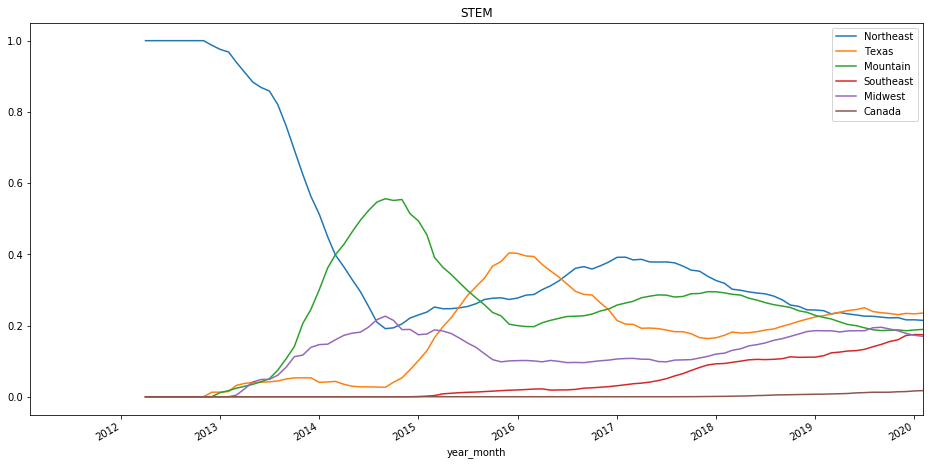

In [45]:
category_visualisation(main,'STEM')

In [55]:
# Website trend
import plotly.graph_objs as go
import plotly.offline as pyo

traces = []
for region in regions:
    y_values = (main[main[region] > 0].groupby('year_month').sum()['pageviews']/main.groupby('year_month').sum()['pageviews']).rolling(3).mean()
    traces.append(go.Scatter(
        x = y_values.index,
        y = y_values,
        mode = 'lines',
        name = region
    ))
    
layout = go.Layout(
        title='Proportional Hits on Website',
        xaxis={'title': 'Year'},
        yaxis={'title': 'Proportional Pageviews'},
        hovermode='closest',
        height=700
)

fig = go.Figure(data=traces,layout=layout)
pyo.plot(fig, filename=root_path+'page_hits.html')

'/Users/sahajsomani1/Desktop/DSC 383/page_hits.html'

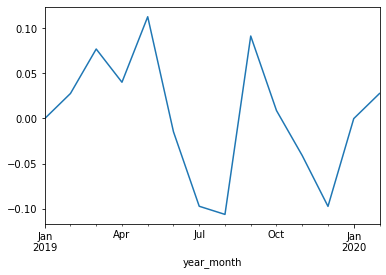

In [78]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

df = main[main['Northeast'] > 0 & (main['year_month'].dt.year >= 2015)].groupby('year_month').sum()

decomposition = seasonal_decompose((df['STEM']/df['pageviews']), model='additive')
decomposition.seasonal[-14:].plot()
pass

In [79]:
main.head()

,year_month,page_path,pageviews,Arts-Participate,Arts-Watch,Arts-Watch:Music/Concert,Arts-Watch:Dramatic arts,Arts-Visual,Outdoor-general,STEM,Active - Participatory:Exercise,Active - Participatory:Sports,Academic,Special needs,Preschool,Other,Northeast,Texas,Mountain,Southeast,Midwest,Canada
0,2011-02-01,albany.kidsoutandabout.com/content/tutor-time,3,0,0,0,0,0,0,3,0,0,3,0,0,0,1,0,0,0,0,0
1,2011-02-01,albany.kidsoutandabout.com/content/1st-friday-...,10,10,10,10,10,10,0,0,10,0,0,0,0,0,1,0,0,0,0,0
2,2011-02-01,albany.kidsoutandabout.com/content/school-brea...,3,0,0,0,0,0,0,0,3,3,0,0,0,0,1,0,0,0,0,0
3,2011-02-01,albany.kidsoutandabout.com/content/school-brea...,3,0,0,0,0,0,0,0,3,3,0,0,0,0,1,0,0,0,0,0
4,2011-03-01,albany.kidsoutandabout.com/content/1st-friday-...,9,9,9,9,9,9,0,0,9,0,0,0,0,0,1,0,0,0,0,0


In [80]:
main['All'] = 1

In [81]:
main.to_csv('final_dataset.csv')

In [ ]:
peeps = 